In [1]:
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS, Predictive
from numpyro.diagnostics import hpdi

import jax
import jax.numpy as jnp

import arviz as az

import matplotlib.pyplot as plt

/home/vscode/.cache/pypoetry/virtualenvs/combustible-bayes-u3bLjQHq-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'arviz'

In [2]:
def model(data):
    
    # Define prior distributions for model parameters
    mean = numpyro.sample("mean", dist.Normal(0, 1))
    scale = numpyro.sample("scale", dist.Exponential(1))

    # Define likelihood
    numpyro.sample("obs", dist.Normal(mean, scale), obs=data)


In [3]:
nuts_kernel = NUTS(model)

In [11]:
# data
data = jnp.array([2.3, 3.9, 1.7, -0.8, 2.5])

mcmc = MCMC(nuts_kernel, 
            num_samples=1000, 
            num_warmup=1000, 
            num_chains=2, 
            #chain_method='parallel', 
            progress_bar=True)
mcmc.run(jax.random.PRNGKey(0), data)


/tmp/ipykernel_1083/1028186087.py:4: UserWarning: There are not enough devices to run parallel chains: expected 2 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(2)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel,


sample: 100%|██████████| 2000/2000 [00:00<00:00, 12189.87it/s, 3 steps of size 7.47e-01. acc. prob=0.90]


In [5]:
# Get the posterior samples
posterior_samples = mcmc.get_samples()


In [6]:
# Print summary statistics of posterior
mcmc.print_summary()


                mean       std    median      5.0%     95.0%     n_eff     r_hat
      mean      1.18      0.68      1.24      0.09      2.28    864.97      1.00
     scale      1.86      0.62      1.73      1.01      2.72    925.56      1.00

Number of divergences: 0


array([[<Axes: title={'center': 'mean'}>,
        <Axes: title={'center': 'mean'}>],
       [<Axes: title={'center': 'scale'}>,
        <Axes: title={'center': 'scale'}>]], dtype=object)

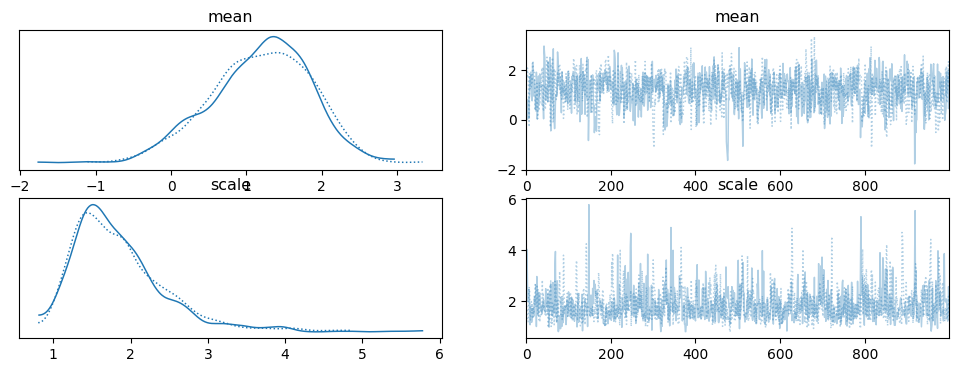

In [7]:
# Visualise posterior distributions and trace plots
az.plot_trace(mcmc)